## 3.4逻辑回归(二分类)

### 1sigmoid函数
本函数可以将输出转化为概率，从而实现二分类。

### 2伯努利概型

### 3最大似然法和交叉熵误差
结合伯努利概型和最大似然估计法推导出了交叉熵误差，他的原理是调整参数使似然度不断增大，但是有一个技巧就是将似然度取负得到L函数，这样让似然度变大就成了调整参数使得L变小，这就成了损失函数的本质。

In [1]:
import torch
import matplotlib.pyplot as plt

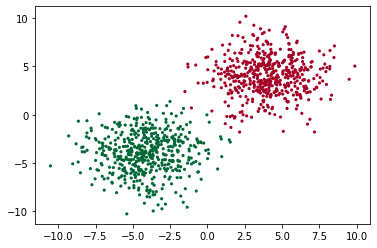

In [2]:
cluster = torch.ones(500, 2)
data0 = torch.normal(4 * cluster, 2)
data1 = torch.normal(-4 * cluster, 2)
label0 = torch.zeros(500)
label1 = torch.ones(500)

x = torch.cat((data0, data1), ).type(torch.FloatTensor)
y = torch.cat((label0, label1), ).type(torch.LongTensor)
plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=10, lw=0, cmap='RdYlGn')
plt.show()

In [3]:
from torch import nn, optim

In [4]:
class Net(nn.Module):  # 继承 torch 的 Module
    def __init__(self):
        super(Net, self).__init__()  # 继承 __init__ 功能
        self.linear = nn.Linear(2, 2)  #输入输出都是二维的

    def forward(self, x):
        x = self.linear(x)
        x = torch.sigmoid(x)
        return x

In [5]:
CUDA = torch.cuda.is_available()

if CUDA:
    net = Net().cuda()
    inputs = x.cuda()
    target = y.cuda()
else:
    net = Net()
    inputs = x
    target = y

In [6]:
optimizer = optim.SGD(net.parameters(), lr=0.02)
criterion = nn.CrossEntropyLoss()

In [7]:
def draw(output):
    if CUDA:
        output = output.cpu()
    plt.cla()

    output = torch.max(output, 1)[1]
    pred_y = output.data.numpy().squeeze()
    target_y = y.numpy()
    plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=pred_y, s=10, lw=0, cmap='RdYlGn')
    accuracy = sum(pred_y == target_y) / 1000.0
    plt.text(1.5, -4, 'Accuracy=%s' % (accuracy), fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.1)

In [8]:
def train(model, criterion, optimizer, epochs):
    for epoch in range(epochs):
        # forward
        output = model(inputs)
        loss = criterion(output, target)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 40 == 0:
            draw(output)

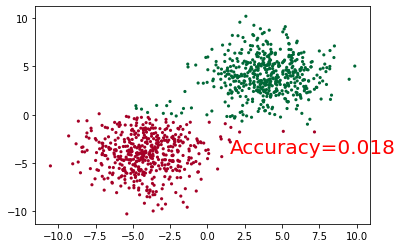

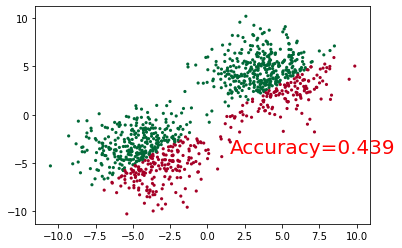

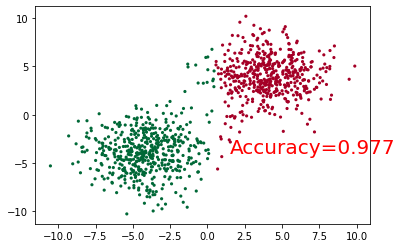

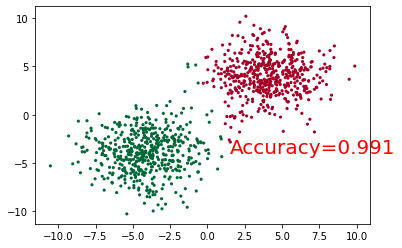

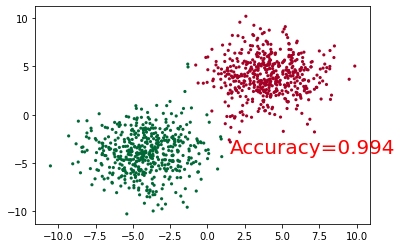

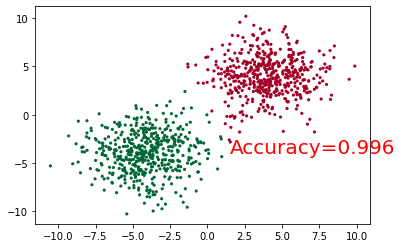

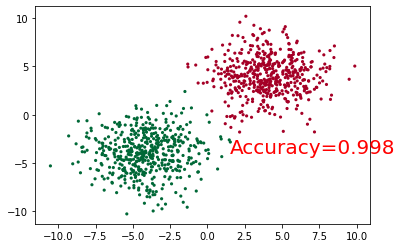

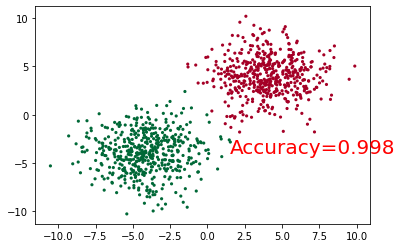

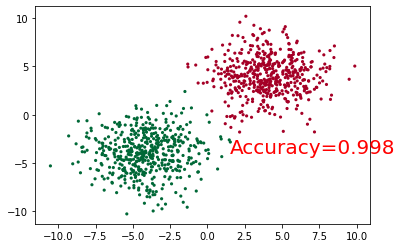

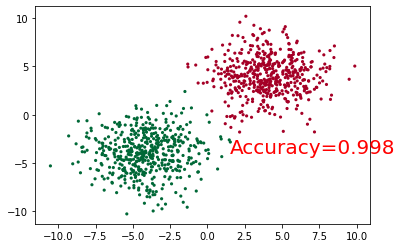

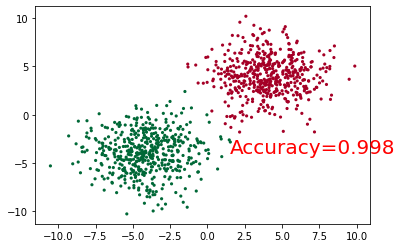

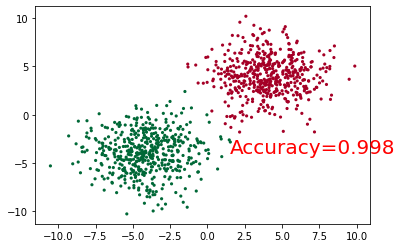

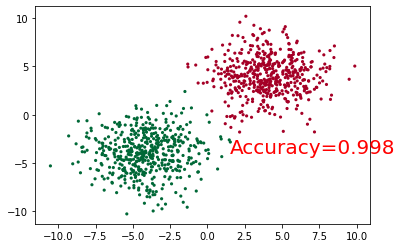

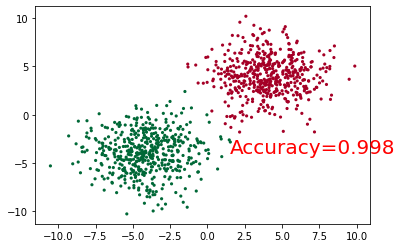

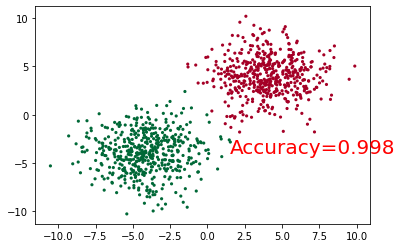

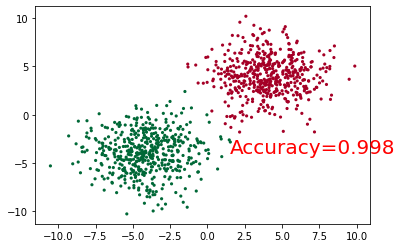

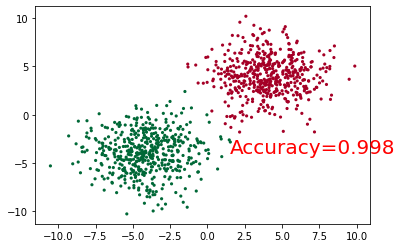

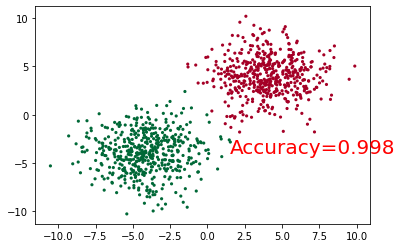

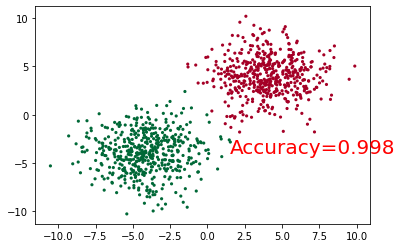

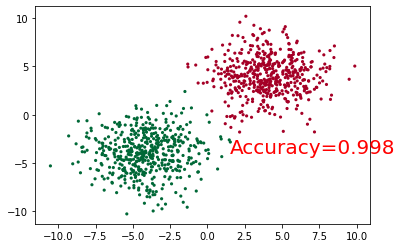

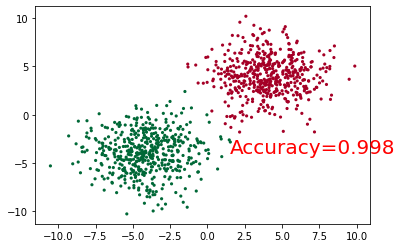

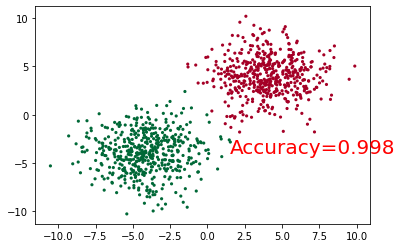

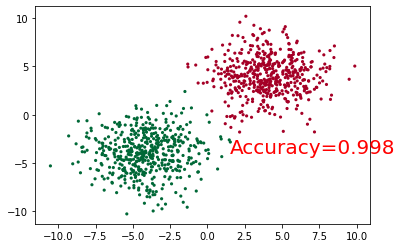

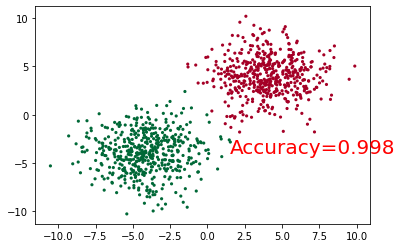

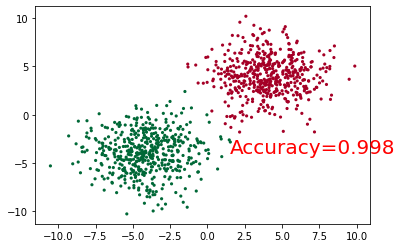

In [9]:
train(net, criterion, optimizer, 1000)